In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
data=loadmat("ex4data1.mat")

In [4]:
X=data["X"]
y=data["y"]

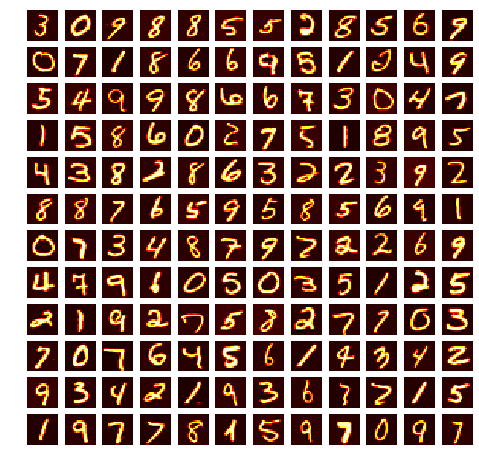

In [10]:
import matplotlib.image as matimg
fig,axis=plt.subplots(12,12,figsize=(8,8))
for i in range(12):
    for j in range(12):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"),cmap="hot")
        axis[i,j].axis("off")

In [11]:
def sigmoid(z):
    k=1/(1+np.exp(-z))
    return k

In [12]:
def sigmoidgradient(z):
    sigmoid=1/(1+np.exp(-z))
    return sigmoid*(1-sigmoid)

In [13]:
weights=loadmat("ex4weights.mat")

In [14]:
theta1=weights["Theta1"]
theta2=weights["Theta2"]

In [22]:
theta1.shape

(25, 401)

In [24]:
theta2.shape

(10, 26)

In [16]:
def forprop(theta1,theta2,X):
    m=X.shape[0]
    X=np.hstack((np.ones((m,1)),X))
    a1=sigmoid(X @ theta1.T)
    a1=np.hstack((np.ones((m,1)),a1))
    a2=sigmoid(a1 @ theta2.T)
    return np.argmax(a2,axis=1)+1

In [21]:
pred=forprop(theta1,theta2,X)
print(sum(pred[:,np.newaxis]==y)[0]/5000*100)

97.52


In [29]:
def nncost(nnparm,hidden_layer,input_layer,num_labels,X,y,Lambda):
    
    
    #getting theta1 and theta2 from nnparm
    theta1=nnparm[:((input_layer+1)*hidden_layer)].reshape(hidden_layer,input_layer+1)
    theta2=nnparm[((input_layer+1)*hidden_layer):].reshape(num_labels,hidden_layer+1)
    m=X.shape[0]
    J=0
    X=np.hstack((np.ones((m,1)),X))
    y10=np.zeros((m,num_labels))
    
    a1=sigmoid(X @ theta1.T)
    a1=np.hstack((np.ones((m,1)),a1))
    a2=sigmoid(a1 @ theta2.T)
    
    for i in range(1,num_labels+1):
        y10[:,i-1][:,np.newaxis]=np.where(y==i,1,0)
    for j in range(num_labels):
        J=J+sum(-y10[:,j]*np.log(a2[:,j])-(1-y10[:,j])*np.log(1-a2[:,j]))
    
    cost=1/m*J
    reg_cost=cost+(Lambda/(2*m))*(np.sum(theta1[:,1:]**2)+np.sum(theta2[:,1:]**2))
    
    #compute gradient
    grad1=np.zeros((theta1.shape))
    grad2=np.zeros((theta2.shape))
    for i in range(m):
        xi=X[i,:]
        a1i=a1[i,:]
        a2i=a2[i,:]
        d2=a2i-y10[i,:]
        d1=theta2.T @ d2.T *sigmoidgradient(np.hstack((1,xi @ theta1.T)))
        grad1=grad1+d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2=grad2+d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1=1/m*grad1
    grad2=1/m*grad2
        
        
    reg_grad1=grad1+(Lambda/m)*np.hstack((np.zeros((theta1.shape[0],1)),theta1[:,1:]))
    reg_grad2=grad2+(Lambda/m)*np.hstack((np.zeros((theta2.shape[0],1)),theta2[:,1:]))
    return cost,grad1,grad2,reg_cost,reg_grad1,reg_grad2

In [30]:
input_layer=400
hidden_layer=25
num_labels=10
nnparm=np.append(theta1.flatten(),theta2.flatten())
cost,reg=nncost(nnparm,hidden_layer,input_layer,num_labels,X,y,1)[0:4:3]
print(cost)
print(reg)

0.2876291651613188
0.38376985909092354


In [31]:
def randominit(l_in,l_out):
    ep=(6**1/2)/((l_in+l_out)**1/2)
    w=np.random.rand(l_out,l_in+1)*(2*ep)-ep
    return w

In [33]:
initt1=randominit(input_layer,hidden_layer)
initt2=randominit(hidden_layer,num_labels)
nnparm1=np.append(initt1.flatten(),initt2.flatten())

In [40]:
def gradientdescent(X,y,nnparm1,alpha,num_iters,Lambda,input_layer, hidden_layer, num_labels):
    Theta1 = nnparm1[:((input_layer+1) * hidden_layer)].reshape(hidden_layer,input_layer+1)
    Theta2 = nnparm1[((input_layer +1)* hidden_layer):].reshape(num_labels,hidden_layer+1)
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        nnparms = np.append(Theta1.flatten(),Theta2.flatten())
        cost, grad1, grad2 = nncost(nnparms,hidden_layer,input_layer, num_labels,X, y,Lambda)[3:]
        Theta1 = Theta1 - (alpha * grad1)
        Theta2 = Theta2 - (alpha * grad2)
        J_history.append(cost)
    
    nn_paramsFinal = np.append(Theta1.flatten(),Theta2.flatten())
    return nn_paramsFinal , J_history

In [41]:
parm,costs=gradientdescent(X,y,nnparm1,0.8,800,1,input_layer,hidden_layer,num_labels)

In [42]:
Theta1 = parm[:((input_layer+1) * hidden_layer)].reshape(hidden_layer,input_layer+1)
Theta2 = parm[((input_layer +1)* hidden_layer):].reshape(num_labels,hidden_layer+1)

In [44]:
pred3 = forprop(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred3[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 94.69999999999999 %
